In [92]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
data=pd.read_csv('dataforclass.csv')
data

,crmrte,prbarr,prbconv,prbpris,polpc,density,urban,awage,lawage,crime
0,0.039885,0.289696,0.402062,0.472222,0.001787,2.307159,0,257.4241,5.550725,1
1,0.038345,0.338111,0.433005,0.506993,0.001767,2.330254,0,272.7497,5.608555,1
2,0.030305,0.330449,0.525703,0.479705,0.001836,2.341801,0,396.5378,5.982771,0
3,0.034726,0.362525,0.604706,0.520104,0.001886,2.346420,0,299.1779,5.701038,1
4,0.036573,0.325395,0.578723,0.497059,0.001924,2.364896,0,312.5454,5.744750,1
...,...,...,...,...,...,...,...,...,...,...
625,0.015575,0.226667,0.480392,0.428571,0.001073,0.869048,0,257.8611,5.552421,0
626,0.013662,0.204188,1.410260,0.372727,0.001109,0.872024,0,264.0230,5.576036,0
627,0.013086,0.180556,0.830769,0.333333,0.001054,0.875000,0,272.6564,5.608212,0
628,0.012874,0.112676,2.250000,0.244444,0.001088,0.880952,0,293.9274,5.683333,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crmrte   630 non-null    float64
 1   prbarr   630 non-null    float64
 2   prbconv  630 non-null    float64
 3   prbpris  630 non-null    float64
 4   polpc    630 non-null    float64
 5   density  630 non-null    float64
 6   urban    630 non-null    int64  
 7   awage    630 non-null    float64
 8   lawage   630 non-null    float64
 9   crime    630 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 49.3 KB


In [16]:
data.describe()

,crmrte,prbarr,prbconv,prbpris,polpc,density,urban,awage,lawage,crime
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.031588,0.307368,0.688618,0.425518,0.001917,1.386062,0.088889,287.252366,5.645461,0.384127
std,0.018121,0.171205,1.690345,0.087245,0.002735,1.439703,0.284809,52.089845,0.169575,0.486775
min,0.001812,0.058824,0.068376,0.148936,0.000458,0.197719,0.000000,194.567500,5.270779,0.000000
25%,0.018352,0.217902,0.347692,0.374403,0.001191,0.532944,0.000000,251.727075,5.528345,0.000000
50%,0.028441,0.278240,0.474375,0.428571,0.001451,0.952595,0.000000,279.948650,5.634606,0.000000
75%,0.038406,0.352518,0.635597,0.483189,0.001803,1.507818,0.000000,313.312025,5.747200,1.000000
max,0.163835,2.750000,37.000000,0.678571,0.035578,8.827652,1.000000,584.949900,6.371526,1.000000


In [56]:
data.shape

(630, 10)

In [41]:
poor=data[data.prbarr>1]
poor

,crmrte,prbarr,prbconv,prbpris,polpc,density,urban,awage,lawage,crime
352,0.001812,2.75000,2.27273,0.240000,0.013134,0.374723,0,269.8035,5.597694,0
356,0.005533,1.09091,1.50000,0.500000,0.009054,0.385809,0,347.7498,5.851483,0
582,0.014894,1.07143,3.06667,0.347826,0.012766,0.377049,0,215.0134,5.370700,0
583,0.010537,1.20000,3.33333,0.475000,0.012645,0.379391,0,229.3320,5.435171,0
584,0.015184,1.21429,4.11765,0.271429,0.011931,0.384075,0,238.0383,5.472432,0


# Ploting correlation map

<function matplotlib.pyplot.show(close=None, block=None)>

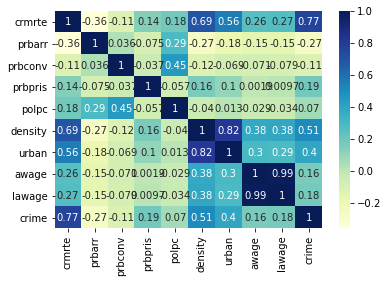

In [42]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show

In [43]:
y=data['crmrte']
x=data['density']

In [48]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.6,
                                         test_size=0.4, random_state=100)

In [49]:
x_train_sm=sm.add_constant(x_train)

In [50]:
crime_fr=sm.OLS(y_train, x_train_sm).fit()

In [51]:
crime_fr.params

const      0.019380
density    0.008522
dtype: float64

In [54]:
crime_fr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     312.8
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           2.31e-51
Time:                        11:55:21   Log-Likelihood:                 1091.1
No. Observations:                 378   AIC:                            -2178.
Df Residuals:                     376   BIC:                            -2170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.001     20.024      0.000       0.017       0.021
density        0.0085      0.000     17.685      0.000       0.008       0.009
==============================================================================
Omnibus:                      360.906   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17531.876
Skew:                           3.851   Prob(JB):                         0.00
Kurtosis:                      35.463   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

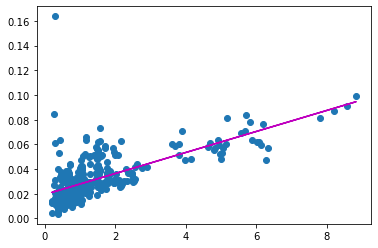

In [62]:
plt.scatter(x_train, y_train)
plt.plot(x_train,   0.019380+0.008522*x_train, 'm')
plt.show()

In [63]:
yhat=crime_fr.predict(x_train_sm)
err=(y_train - yhat)

C:\Users\AFOS-Pavilion-32\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


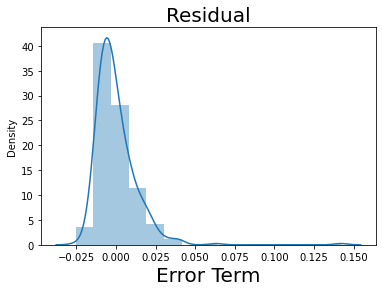

In [69]:
fig=plt.figure()
sns.distplot(err, bins=15)
plt.title('Residual', fontsize=20)
plt.xlabel('Error Term',fontsize=20)
plt.show()

In [71]:
x_test_sm=sm.add_constant(x_test)
y_test_pred=crime_fr.predict(x_test_sm)
y_test_pred

396    0.071111
136    0.034840
388    0.030443
75     0.041364
471    0.029609
         ...   
129    0.025467
190    0.023646
240    0.024666
100    0.023721
254    0.025936
Length: 252, dtype: float64

In [72]:
r_squared=r2_score(y_test, y_test_pred)
r_squared

0.5225385763398582

In [87]:
y=data['crmrte']
x=data[['density','prbarr','lawage','urban']]
x=sm.add_constant(x)

In [88]:
crime_fr=sm.OLS(y,x)
crime_fr_res=crime_fr.fit()
crime_fr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           3.46e-96
Time:                        13:23:49   Log-Likelihood:                 1860.0
No. Observations:                 630   AIC:                            -3710.
Df Residuals:                     625   BIC:                            -3688.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0303      0.018      1.666      0.096      -0.005       0.066
density        0.0082      0.001     12.650      0.000       0.007       0.009
prbarr        -0.0195      0.003     -6.324      0.000      -0.026      -0.013
lawage        -0.0007      0.003     -0.218      0.828      -0.007       0.006
urban         -0.0001      0.003     -0.033      0.974      -0.006       0.006
==============================================================================
Omnibus:                      489.183   Durbin-Watson:                   0.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16297.144
Skew:                           3.100   Prob(JB):                         0.00
Kurtosis:                      27.133   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

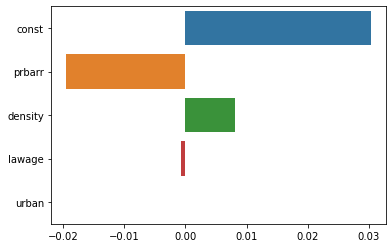

In [90]:
coeff=crime_fr_res.params
coeff=coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h')

In [94]:
Y=data['crime']
X=data[['density','prbarr','lawage','urban','prbconv']]
X=sm.add_constant(X)

In [96]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, train_size=0.6,
                                         test_size=0.4, random_state=100)

In [98]:
crime_prob=LogisticRegression()
crime_prob.fit(X_train,Y_train)
crime_pred=crime_prob.predict(X_test)
crime_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [100]:
crime_prob.score(X_test,Y_test)

0.7777777777777778